In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [4]:
path = 'https://raw.githubusercontent.com/VivekJeldi/Titanic-Survival/main/df_WOE.csv'

In [5]:
df = pd.read_csv(path)
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,-0.668306,-0.983517,-0.05768,0.043481,-0.040032,-0.390257,-0.699805,-0.193903,0
1,1.014672,1.528054,-0.05768,0.043481,-0.040032,1.038842,0.653786,0.686576,1
2,-0.668306,1.528054,-0.05768,0.043481,-0.040032,-0.390257,-0.699805,-0.193903,1
3,1.014672,1.528054,-0.05768,0.043481,-0.040032,1.038842,0.653786,-0.193903,1
4,-0.668306,-0.983517,-0.05768,0.043481,-0.040032,-0.390257,-0.699805,-0.193903,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    890 non-null    float64
 1   Sex       890 non-null    float64
 2   Age       890 non-null    float64
 3   SibSp     890 non-null    float64
 4   Parch     890 non-null    float64
 5   Fare      890 non-null    float64
 6   Cabin     890 non-null    float64
 7   Embarked  890 non-null    float64
 8   Survived  890 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 62.7 KB


In [7]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
Survived    0
dtype: int64

In [8]:
df['Survived'] = df['Survived'].astype('category')

In [9]:
col = ['Pclass', 'Sex', 'Fare', 'Embarked']


In [10]:
y = df['Survived']
# X = df.drop('Survived',axis=1)
X = df[col]

In [11]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [12]:
y_train

708    1
239    0
381    0
792    0
672    1
      ..
106    1
270    0
860    0
435    0
102    0
Name: Survived, Length: 712, dtype: category
Categories (2, int64): [0, 1]

In [13]:
X_train.columns

Index(['Pclass', 'Sex', 'Fare', 'Embarked'], dtype='object')

In [14]:
# Features from WOE
col = ['Pclass', 'Sex', 'Fare', 'Embarked']

#col = ['Pclass', 'Sex', 'Age','SibSp','Fare', 'Cabin', 'Embarked']
#col = X_train.columns

In [15]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train[col], y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = rfc.predict(X_test[col])

In [17]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        98
           1       0.90      0.69      0.78        80

    accuracy                           0.83       178
   macro avg       0.84      0.81      0.82       178
weighted avg       0.84      0.83      0.82       178



In [18]:
metrics.confusion_matrix(y_test, y_pred)

array([[92,  6],
       [25, 55]])

In [19]:
rfc = RandomForestClassifier(random_state=42)

rfc.fit(X[col],y)

RandomForestClassifier(random_state=42)

In [20]:
test_path = 'https://raw.githubusercontent.com/VivekJeldi/Titanic-Survival/main/Test_WOE.csv'

In [21]:
test = pd.read_csv(test_path)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,-0.668306,"Kelly, Mr. James",-0.983517,-0.057680,0.043481,-0.040032,330911,-0.390257,1.610899,0.022514
1,893,-0.668306,"Wilkes, Mrs. James (Ellen Needs)",1.528054,-0.221683,0.043481,-0.040032,363272,-0.390257,1.610899,-0.193903
2,894,0.362662,"Myles, Mr. Thomas Francis",-0.983517,-0.221683,0.043481,-0.040032,240276,-0.390257,0.301566,0.022514
3,895,-0.668306,"Wirz, Mr. Albert",-0.983517,-0.057680,0.043481,-0.040032,315154,-0.390257,1.610899,-0.193903
4,896,-0.668306,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1.528054,-0.057680,0.043481,-0.040032,3101298,-0.390257,1.610899,-0.193903


In [22]:
y_pred = rfc.predict_proba(test[col])


In [23]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.head()

,0,1
0,0.920245,0.079755
1,0.558049,0.441951
2,0.966812,0.033188
3,0.880924,0.119076
4,0.558049,0.441951


In [24]:
y_pred_1 = y_pred_df.iloc[:,1]
pred_1_df = pd.DataFrame(y_pred_1)
pred_1_df.head()

,1
0,0.079755
1,0.441951
2,0.033188
3,0.119076
4,0.441951


In [25]:
test_pred = pd.concat([test['PassengerId'], pred_1_df], 1)
test_pred['Survived'] = test_pred.loc[:,1].map(lambda x:1 if x>0.5 else 0)
test_pred.head()

,PassengerId,1,Survived
0,892,0.079755,0
1,893,0.441951,0
2,894,0.033188,0
3,895,0.119076,0
4,896,0.441951,0


In [26]:
test_pred = test_pred.drop(1, axis=1)
test_pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [27]:
test_pred.to_csv('RF_0.5_default_col_3.csv', index=False)

In [28]:
n_folds = 5

In [29]:
# Max Depth
parameter = {'max_depth':range(6)}

rf = RandomForestClassifier()

rf = GridSearchCV(rf,
                 parameter,
                 cv=n_folds,
                 return_train_score=True)

rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(0, 6)}, return_train_score=True)

In [30]:
scores = pd.DataFrame(rf.cv_results_)
scores.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,0.243470,0.004726,0.016282,0.000560,4,{'max_depth': 4},0.790210,0.825175,0.823944,0.774648,...,0.803359,0.019479,1,0.813708,0.804921,0.805263,0.817544,0.808772,0.810042,0.004907
3,0.233745,0.003946,0.015739,0.000845,3,{'max_depth': 3},0.790210,0.825175,0.788732,0.774648,...,0.801950,0.022093,2,0.813708,0.804921,0.803509,0.817544,0.803509,0.808638,0.005856
2,0.232915,0.002328,0.015011,0.000431,2,{'max_depth': 2},0.790210,0.825175,0.816901,0.739437,...,0.799133,0.032412,3,0.813708,0.797891,0.800000,0.801754,0.798246,0.802320,0.005859
5,0.246585,0.013162,0.015773,0.000724,5,{'max_depth': 5},0.769231,0.825175,0.823944,0.774648,...,0.793529,0.025416,4,0.817223,0.804921,0.805263,0.817544,0.814035,0.811797,0.005612
1,0.239252,0.012810,0.015699,0.000780,1,{'max_depth': 1},0.755245,0.797203,0.767606,0.732394,...,0.769644,0.024663,5,0.766257,0.776801,0.784211,0.792982,0.777193,0.779489,0.008854
0,0.000846,0.000125,0.000000,0.000000,0,{'max_depth': 0},NaN,NaN,NaN,NaN,...,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


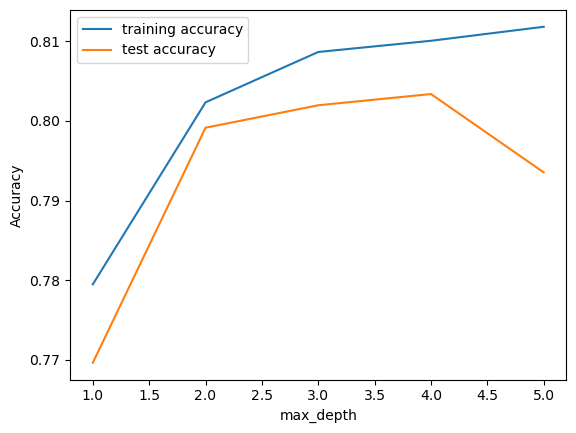

In [31]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [32]:
# max_depth = 4

In [33]:
# Number of Estimators
parameter = {'n_estimators':[100,500,1000,1500]}

rf = RandomForestClassifier()

rf = GridSearchCV(rf,
                 parameter,
                 cv=n_folds,
                 return_train_score=True)

rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [100, 500, 1000, 1500]},
             return_train_score=True)

In [34]:
scores = pd.DataFrame(rf.cv_results_)
scores.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.244516,0.005053,0.016302,0.000476,100,{'n_estimators': 100},0.769231,0.811189,0.823944,0.774648,...,0.790732,0.022366,1,0.817223,0.806678,0.805263,0.817544,0.814035,0.812149,0.005211
1,1.198258,0.012899,0.067709,0.002001,500,{'n_estimators': 500},0.769231,0.811189,0.823944,0.774648,...,0.790732,0.022366,1,0.817223,0.806678,0.805263,0.817544,0.814035,0.812149,0.005211
2,2.454162,0.060235,0.136162,0.001679,1000,{'n_estimators': 1000},0.769231,0.811189,0.823944,0.774648,...,0.790732,0.022366,1,0.817223,0.806678,0.805263,0.817544,0.814035,0.812149,0.005211
3,3.613247,0.055867,0.235304,0.063143,1500,{'n_estimators': 1500},0.769231,0.811189,0.823944,0.774648,...,0.790732,0.022366,1,0.817223,0.806678,0.805263,0.817544,0.814035,0.812149,0.005211


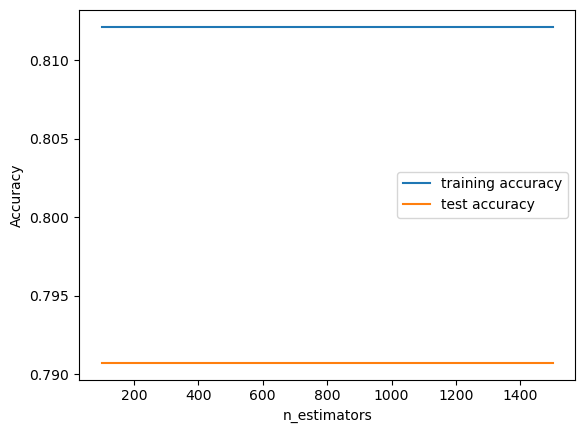

In [35]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [36]:
# n_estimators=500

In [37]:
# Max Features
parameter = {'max_features':range(5)}

rf = RandomForestClassifier()

rf = GridSearchCV(rf,
                 parameter,
                 cv=n_folds,
                 return_train_score=True)

rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': range(0, 5)}, return_train_score=True)

In [38]:
scores = pd.DataFrame(rf.cv_results_)
scores.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.243899,0.002608,0.016811,0.000730,1,{'max_features': 1},0.769231,0.811189,0.823944,0.774648,...,0.790732,0.022366,1,0.817223,0.806678,0.805263,0.817544,0.814035,0.812149,0.005211
2,0.244224,0.005024,0.016463,0.000467,2,{'max_features': 2},0.769231,0.811189,0.823944,0.774648,...,0.790732,0.022366,1,0.817223,0.806678,0.805263,0.817544,0.814035,0.812149,0.005211
3,0.245662,0.005514,0.016236,0.000422,3,{'max_features': 3},0.769231,0.811189,0.816901,0.774648,...,0.789323,0.020362,3,0.815466,0.806678,0.805263,0.817544,0.814035,0.811797,0.004907
4,0.250438,0.006726,0.016384,0.000859,4,{'max_features': 4},0.748252,0.811189,0.823944,0.774648,...,0.786536,0.027406,4,0.817223,0.806678,0.805263,0.817544,0.814035,0.812149,0.005211
0,0.000834,0.000243,0.000000,0.000000,0,{'max_features': 0},NaN,NaN,NaN,NaN,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


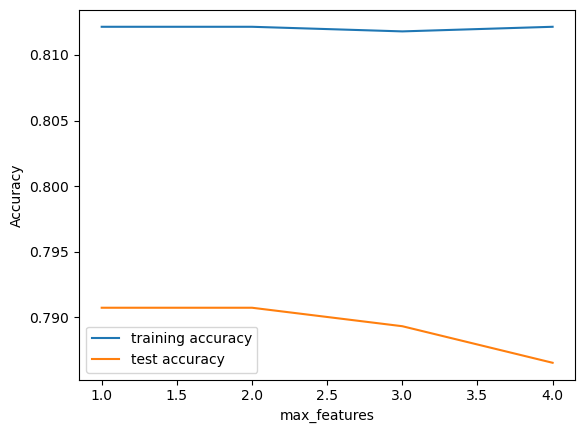

In [39]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [40]:
# max_features=2

In [41]:
# Min Samples Leaf
parameter = {'min_samples_leaf':range(2,20,2)}

rf = RandomForestClassifier()

rf = GridSearchCV(rf,
                 parameter,
                 cv=n_folds,
                 return_train_score=True)

rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(2, 20, 2)},
             return_train_score=True)

In [42]:
scores = pd.DataFrame(rf.cv_results_)
scores.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,0.241641,0.009921,0.015953,0.000426,6,{'min_samples_leaf': 6},0.790210,0.825175,0.823944,0.774648,...,0.808992,0.022367,1,0.813708,0.804921,0.805263,0.817544,0.803509,0.808989,0.005584
4,0.232693,0.001968,0.015855,0.001012,10,{'min_samples_leaf': 10},0.790210,0.825175,0.823944,0.767606,...,0.807584,0.024596,2,0.813708,0.804921,0.805263,0.812281,0.803509,0.807936,0.004196
7,0.244935,0.006447,0.017698,0.003567,16,{'min_samples_leaf': 16},0.790210,0.825175,0.816901,0.774648,...,0.806176,0.020202,3,0.813708,0.804921,0.800000,0.817544,0.798246,0.806884,0.007564
5,0.239552,0.004072,0.015899,0.000884,12,{'min_samples_leaf': 12},0.790210,0.825175,0.816901,0.767606,...,0.804767,0.022469,4,0.813708,0.804921,0.800000,0.812281,0.798246,0.805831,0.006261
6,0.239067,0.001452,0.015642,0.000533,14,{'min_samples_leaf': 14},0.783217,0.825175,0.816901,0.767606,...,0.803368,0.023525,5,0.808436,0.797891,0.800000,0.812281,0.798246,0.803371,0.005877
8,0.239018,0.006571,0.016019,0.001237,18,{'min_samples_leaf': 18},0.783217,0.825175,0.816901,0.767606,...,0.803368,0.023525,5,0.808436,0.797891,0.800000,0.812281,0.798246,0.803371,0.005877
3,0.239517,0.005544,0.015750,0.000407,8,{'min_samples_leaf': 8},0.790210,0.825175,0.823944,0.767606,...,0.796316,0.024196,7,0.813708,0.804921,0.805263,0.812281,0.810526,0.809340,0.003613
1,0.240308,0.003438,0.016239,0.000907,4,{'min_samples_leaf': 4},0.769231,0.825175,0.823944,0.774648,...,0.793529,0.025416,8,0.817223,0.804921,0.805263,0.817544,0.814035,0.811797,0.005612
0,0.243661,0.001625,0.016240,0.000719,2,{'min_samples_leaf': 2},0.769231,0.811189,0.823944,0.774648,...,0.790732,0.022366,9,0.817223,0.806678,0.805263,0.817544,0.814035,0.812149,0.005211


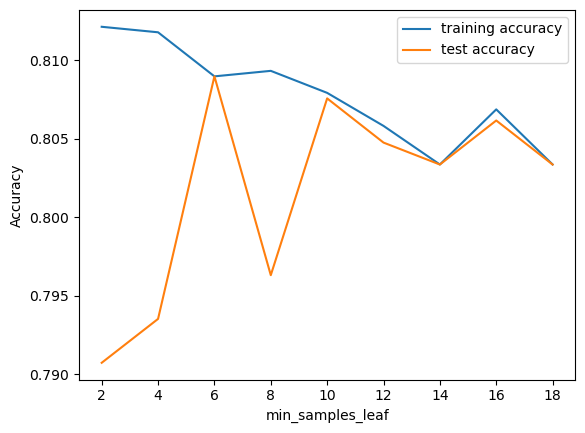

In [43]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [44]:
# min_samples_leaf = 10

In [45]:
# Min Samples Split
parameter = {'min_samples_split':range(50,70,5)}

rf = RandomForestClassifier()

rf = GridSearchCV(rf,
                 parameter,
                 cv=n_folds,
                 return_train_score=True)

rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(50, 70, 5)},
             return_train_score=True)

In [46]:
scores = pd.DataFrame(rf.cv_results_)
scores.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.238708,0.008846,0.015835,0.000461,50,{'min_samples_split': 50},0.790210,0.825175,0.823944,0.774648,...,0.808992,0.022367,1,0.813708,0.804921,0.805263,0.817544,0.803509,0.808989,0.005584
1,0.236678,0.002833,0.015892,0.000419,55,{'min_samples_split': 55},0.790210,0.825175,0.823944,0.774648,...,0.808992,0.022367,1,0.813708,0.804921,0.805263,0.817544,0.803509,0.808989,0.005584
2,0.238945,0.003472,0.015563,0.000243,60,{'min_samples_split': 60},0.790210,0.825175,0.823944,0.767606,...,0.806176,0.023388,3,0.813708,0.797891,0.805263,0.812281,0.798246,0.805478,0.006692
3,0.240573,0.004809,0.015862,0.000815,65,{'min_samples_split': 65},0.783217,0.811189,0.781690,0.760563,...,0.785078,0.016193,4,0.808436,0.790861,0.798246,0.803509,0.785965,0.797403,0.008165


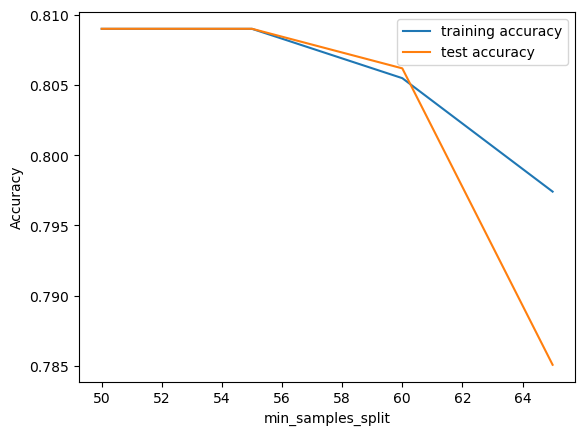

In [47]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [48]:
# min_samples_split = 50

In [49]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [3,4],
    'min_samples_leaf': [10,12],
    'min_samples_split': [50,55],
    'n_estimators': [100,500,1000], 
    #'max_features': [3,4,5]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1, return_train_score=True)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4], 'min_samples_leaf': [10, 12],
                         'min_samples_split': [50, 55],
                         'n_estimators': [100, 500, 1000]},
             return_train_score=True, verbose=1)

In [50]:
scores = pd.DataFrame(grid_search.cv_results_)
scores.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
2,3.451250,0.013881,0.204674,0.003673,3,10,50,1000,"{'max_depth': 3, 'min_samples_leaf': 10, 'min_...",0.810924,0.801688,0.801688,0.804767,0.004354,1,0.808017,0.804211,0.804211,0.805479,0.001794
12,0.355641,0.003560,0.023705,0.000573,4,10,50,100,"{'max_depth': 4, 'min_samples_leaf': 10, 'min_...",0.810924,0.801688,0.801688,0.804767,0.004354,1,0.808017,0.804211,0.804211,0.805479,0.001794
6,0.339432,0.004932,0.023783,0.000610,3,12,50,100,"{'max_depth': 3, 'min_samples_leaf': 12, 'min_...",0.810924,0.801688,0.801688,0.804767,0.004354,1,0.808017,0.804211,0.804211,0.805479,0.001794
8,3.463769,0.025397,0.215099,0.011720,3,12,50,1000,"{'max_depth': 3, 'min_samples_leaf': 12, 'min_...",0.810924,0.801688,0.801688,0.804767,0.004354,1,0.808017,0.804211,0.804211,0.805479,0.001794
0,0.348766,0.002336,0.025004,0.000538,3,10,50,100,"{'max_depth': 3, 'min_samples_leaf': 10, 'min_...",0.806723,0.801688,0.801688,0.803366,0.002373,5,0.801688,0.804211,0.804211,0.803370,0.001189


In [51]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=50,
                       n_estimators=1000)

In [52]:
y_pred = grid_search.predict(X_test)

In [53]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        98
           1       0.89      0.69      0.77        80

    accuracy                           0.82       178
   macro avg       0.84      0.81      0.81       178
weighted avg       0.83      0.82      0.82       178



In [54]:
metrics.confusion_matrix(y_test, y_pred)

array([[91,  7],
       [25, 55]])

In [55]:
rfc_final = RandomForestClassifier(bootstrap=True,
                                   max_depth=4, 
                                   #max_features=4, 
                                   min_samples_leaf=10,
                                   min_samples_split=50, 
                                   n_estimators=500,
                                  random_state=42)

In [56]:
rfc.fit(X[col],y)

RandomForestClassifier(random_state=42)

In [57]:
X.columns

Index(['Pclass', 'Sex', 'Fare', 'Embarked'], dtype='object')

In [58]:
test_path = 'https://raw.githubusercontent.com/VivekJeldi/Titanic-Survival/main/Test_WOE.csv'

In [59]:
test = pd.read_csv(test_path)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,-0.668306,"Kelly, Mr. James",-0.983517,-0.057680,0.043481,-0.040032,330911,-0.390257,1.610899,0.022514
1,893,-0.668306,"Wilkes, Mrs. James (Ellen Needs)",1.528054,-0.221683,0.043481,-0.040032,363272,-0.390257,1.610899,-0.193903
2,894,0.362662,"Myles, Mr. Thomas Francis",-0.983517,-0.221683,0.043481,-0.040032,240276,-0.390257,0.301566,0.022514
3,895,-0.668306,"Wirz, Mr. Albert",-0.983517,-0.057680,0.043481,-0.040032,315154,-0.390257,1.610899,-0.193903
4,896,-0.668306,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1.528054,-0.057680,0.043481,-0.040032,3101298,-0.390257,1.610899,-0.193903


In [60]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          2
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [61]:
#test[test['Fare'].isna()]

In [62]:
#test[test['Parch'].isna()]

In [63]:
y_pred = rfc.predict_proba(test[col])

In [64]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df

,0,1
0,0.920245,0.079755
1,0.558049,0.441951
2,0.966812,0.033188
3,0.880924,0.119076
4,0.558049,0.441951
...,...,...
413,0.880924,0.119076
414,0.000000,1.000000
415,0.880924,0.119076
416,0.880924,0.119076


In [65]:
y_pred_1 = y_pred_df.iloc[:,1]
pred_1_df = pd.DataFrame(y_pred_1)
pred_1_df.head()

,1
0,0.079755
1,0.441951
2,0.033188
3,0.119076
4,0.441951


In [66]:
test_pred = pd.concat([test['PassengerId'], pred_1_df], 1)
test_pred['Survived'] = test_pred.loc[:,1].map(lambda x:1 if x>0.5 else 0)
test_pred.head()

,PassengerId,1,Survived
0,892,0.079755,0
1,893,0.441951,0
2,894,0.033188,0
3,895,0.119076,0
4,896,0.441951,0


In [67]:
test_pred = test_pred.drop(1, axis=1)
test_pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [68]:
test_pred.to_csv('RF_0.5_3.csv', index=False)